# Import Required Libraries
This cell imports the necessary libraries for data analysis and visualization, including pandas, seaborn, matplotlib, and os.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Load the Data
This cell constructs the path to the data file and loads the insurance dataset into a pandas DataFrame.

In [21]:
notebook_dir = os.getcwd()
data_path = os.path.join(notebook_dir, "..", "data", "MachineLearningRating_v3.txt")

df = pd.read_csv(data_path, delimiter="|")

C:\Users\Bisrat\AppData\Local\Temp\ipykernel_10448\130270177.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, delimiter="|")


# Descriptive Statistics
This cell displays summary statistics for the TotalPremium, TotalClaims, and CustomValueEstimate columns.

In [9]:
df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].describe()

,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


# Data Type Conversion
This cell checks the data types and converts the TransactionMonth column to datetime format.

In [ ]:
df.dtypes
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Missing Values Analysis
This cell calculates and prints the percentage of missing values for each column in the DataFrame.

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 0])

# Distribution Plots
This cell visualizes the distributions of TotalClaims, CustomValueEstimate, and the count of Gender using histograms and a count plot.

In [ ]:
sns.histplot(df["TotalClaims"], kde=True)
sns.histplot(df["CustomValueEstimate"], kde=True)
sns.countplot(data=df, x="Gender")


# Loss Ratio by Province and Gender
This cell calculates the Loss Ratio and visualizes the average Loss Ratio by Province and Gender using a bar plot.

In [ ]:
# Loss Ratio by Province and Gender
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

province_gender = df.groupby(["Province", "Gender"])["LossRatio"].mean().unstack()
province_gender.plot(kind="bar", figsize=(12, 6))

# Boxplot of Total Claims by Gender
This cell creates a boxplot to compare the distribution of Total Claims between different genders.

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='TotalClaims')
plt.title('Boxplot of Total Claims by Gender')
plt.ylabel('Total Claims')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


# Heatmap of Average Loss Ratios by Province & Vehicle Type
This cell groups the data by Province and VehicleType, calculates the mean Loss Ratio, and visualizes it as a heatmap.

In [ ]:
# Group by Province and VehicleType
heatmap_data = df.groupby(['Province', 'VehicleType'])['LossRatio'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Average Loss Ratios by Province & Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

# Correlation Heatmap
This cell visualizes the correlation between TotalPremium, TotalClaims, and CustomValueEstimate using a heatmap.

In [ ]:
sns.heatmap(df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].corr(), annot=True)

# Monthly Trend Analysis
This cell ensures the TransactionMonth column is in datetime format, groups the data by month, and plots the monthly totals for claims and premiums.

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df["TransactionMonth"]):
	df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

monthly = df.groupby(df["TransactionMonth"].dt.to_period("M"))[ ["TotalClaims", "TotalPremium"] ].sum()
monthly.index = monthly.index.to_timestamp() 

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly)
plt.title('Monthly Total Premium vs Total Claims')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplots for Outlier Detection
This cell creates boxplots to visualize potential outliers in TotalClaims and CustomValueEstimate.

In [ ]:
sns.boxplot(data=df, x="TotalClaims")
sns.boxplot(data=df, x="CustomValueEstimate")

# Average Claim by Vehicle Make
This cell calculates and visualizes the top 10 vehicle makes by average claim amount using a horizontal bar plot.

<Axes: title={'center': 'Top 10 Makes by Avg Claim'}, ylabel='make'>

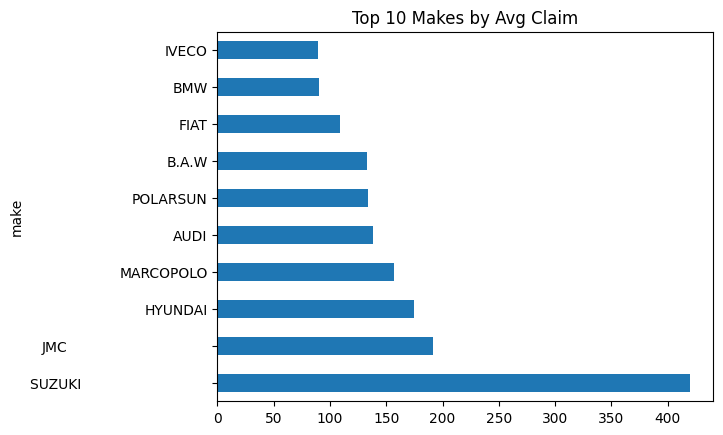

In [20]:
claim_by_make = df.groupby("make")["TotalClaims"].mean().sort_values(ascending=False)
claim_by_make.head(10).plot(kind="barh", title="Top 10 Makes by Avg Claim")